In [3]:
# 
import json
import cv2
import requests
import numpy as np
import base64
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from tencentcloud.common import credential
from tencentcloud.common.profile.client_profile import ClientProfile
from tencentcloud.common.profile.http_profile import HttpProfile
from tencentcloud.common.exception.tencent_cloud_sdk_exception import TencentCloudSDKException
from tencentcloud.tiia.v20190529 import tiia_client
from tencentcloud.tiia.v20190529 import models as tiia_models

with open("../tencent_key.json" ,'r') as key:
    SecretDict=json.loads(key.read())
SecretId=SecretDict["SecretId"]
SecretKey=SecretDict["SecretKey"]

In [13]:
"""
https://console.cloud.tencent.com/api
/explorer?Product=tiia&Version=2019-05-29&Action=EnhanceImage&SignVersion=
图像清晰度增强
"""
try: 
    cred = credential.Credential(SecretId, SecretKey) 
    httpProfile = HttpProfile()
    httpProfile.endpoint = "tiia.tencentcloudapi.com"

    clientProfile = ClientProfile()
    clientProfile.httpProfile = httpProfile
    client = tiia_client.TiiaClient(cred, "ap-beijing", clientProfile) 
    img_path="./images/模糊图片2.jpg"
    with open(img_path,"rb") as file:
        img=base64.b64encode(file.read()) 
    req = tiia_models.EnhanceImageRequest()
    params = {
#         "ImageUrl": "",
        "ImageBase64": str(img, encoding='utf-8'), 
    }
    req.from_json_string(json.dumps(params))

    resp = client.EnhanceImage(req).to_json_string() 
    resp=json.loads(resp)
    print(resp)

except TencentCloudSDKException as err: 
    print(err) 

{'EnhancedImage': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCADSAhADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD8wf2qbrUf+Gxf2vWmup33ftJ/GO2Tc4wLK38YazDaQKpBxFDAVgjC4CrGcbWLE+Ds2GP4cjZjd1IwFz07ZHOc5zivev2tIyv7YH7XCjPy/tK/Gf5uh/5HjWuBke+MDqDjgHNeADO856gY56nnrzyT1

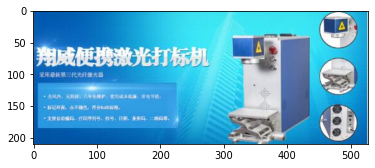

In [14]:
plt.imshow(plt.imread("./images/模糊图片2.jpg"))

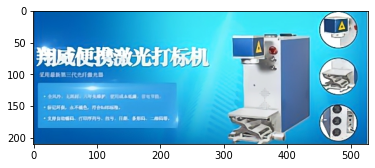

In [15]:
with open("./images/模糊图片处理后2.jpg","wb") as file:
    file.write(base64.b64decode(resp['EnhancedImage']))
face=plt.imread("./images/模糊图片处理后2.jpg")
plt.imshow(face)           